# Welcome to Olympus Playground

This is an interactive notebook to study, play and forcast the growth of your ohm over time. This notebook is designed to work hand in hand with the awesome gitbook created by the DAO and all of Brians calcs!


## This calculator will provide the following projections for you: 

#### ROIs at current reward yield

   * ROI after 1 day at current reward yield
  ___
   * ROI after 5 days at current reward yield
        * OHM and USD ROI and holding value in 5 days
  ___      
   * ROI after 7 days at current reward yield
        * OMH and USD ROI and holding value in 7 days
  ___ 
   * ROI after 1 month at current reward yield
        * OHM and USD ROI and holding value in 1 Month
  ___ 
   * ROI after 1 year at current reward yield
        * OHM and USD ROI and holding value in 1 Year
  ___  
   * Desired target USD
       * Days until desired target USD
  ___
   * Desired target OHM
       * Days until desired target OHM
  ___
   * OHM and USD ROI and holding on specific date. This data will be provided on an interactive chart where you can hover your mouse over any desired date and view the projection.

####  Incooom
   * Desired daily incooom 
     * Required OHM to reach goal
     * Days until you reach required OHMs for daily incoom (Assuming growth by staking alone)
     * Estimated date 
  ___  
   * Desire weekly incooom 
     * Required OHM to reach goal
     * weeks until you reach required OHMs for weeks incoom (Assuming growth by staking alone)
     * Estimated date 

## Libraries
###### Before doing anything in python, we need to first import all neccesarry tools to help with computation. You don't have to worry though, all libraries for basic stuff have been imported for you! However, if you're a python wiz or have some neat tools in mind to enhance your experience

In [6]:
# Import all necessary libraries
import math # Needed for basic math operations\n",
import pandas as pd # Needed fpr dataframe creation and operations\n",
import numpy as np # Needed for array manipulations\n",
from itertools import islice # Needed for more complex row and coloumn slicing\n",
import matplotlib.pyplot as plt # Needed for quickly ploting results"

____

## Price feed
###### We need to keep track of the most recent ohm price for our projections, here we will be using a simple api to grab ohm price from coingecko

In [7]:
from pycoingecko import CoinGeckoAPI # Pulls live data from coingecko
cg = CoinGeckoAPI() # Pulls live price feed from coingecko

___

## Input Variables
###### In this section, we simply declare variables that we will use in our projections. Feel free to create new variables here or in new cells. Change the Input Variables to see how they affect your projections. 

In [8]:
# Variable declarations
ohmPrice = cg.get_price(ids='olympus',vs_currencies='usd') # Get most recent price from coingecko via api
rewardYield = round(0.47/100,5) # current staking reward yield. Curerntly the yield is 0.47% 
rebaseEpochs = 3 # Not really necessary to declare this here, but for reability it works for now
rebaseConst = 1 + rewardYield
currentAPY = 17407/100 # current staking %APY. Need to make this read from a source or user entry
ohmStaked = 20 # Assume we are stating with 20 ohms

In [9]:
# Target calculations variables
desiredUSDTarget = 50000
desiredOHMTarget = 100
desiredDailyIncooom = 500
desiredWeeklyIncooom = 5000

___

---

### ROI at current reward yield
###### Recall reward yield is declared in the input variables section above

In [16]:
# Let's get some ROI Outputs starting with the daily
dailyROI = (1+rewardYield)**3-1 # Equation to calculate your daily ROI based on reward Yield
dailyROI_P = dailyROI*100 # daily ROI in Percentage

In [17]:
# 5 day ROI
fivedayROI = (1+rewardYield)**(5*3)-1 # Equation to calculate your 5 day ROI based on reward Yield
fivedayROI_P = fivedayROI*100 # 5 day ROI in Percentage

In [18]:
# 7 day ROI
sevendayROI = (1+rewardYield)**(7*3)-1 # Equation to calculate your 7 day ROI based on reward Yield
sevendayROI_P = sevendayROI*100 # 7 day ROI in Percentage

In [19]:
# 30 day ROI
monthlyROI = (1+rewardYield)**(30*3)-1 # Equation to calculate your 30 day ROI based on reward Yield
monthlyROI_P = monthlyROI*100 # 30 day ROI in Percentage

In [20]:
# Annual ROI
annualROI = (1+rewardYield)**(365*3)-1 # Equation to calculate your annual ROI based on reward Yield
annualROI_P = annualROI*100 # Equation to calculate your annual ROI based on reward Yield

In [21]:
# Let's create a nice looking table to view the results of our calculations. The table will contain the ROIs and the percentages
roiData = [['Daily',dailyROI_P],['5 Day',fivedayROI_P],['7 Day',sevendayROI_P],['1 Month',monthlyROI_P],['1 Year',annualROI_P]]
roiTablulated_df = pd. DataFrame(roiData,columns = ['Cadence','Percentage'])

In [22]:
roiTablulated_df

,Cadence,Percentage
0,Daily,1.416637
1,5 Day,7.286736
2,7 Day,10.347995
3,1 Month,52.502233
4,1 Year,16876.981452


In [8]:
# ohm growth over time
# STEP 1 : create a data frame to hold all required data point. Data required would be Epochs since rebase are distributed every Epoch
ohmGrowth_df = pd.DataFrame(np.arange(3001), columns = ['Epochs']) # In this case let's consider 3000 Epochs which is 1000 days

In [9]:
ohmGrowth_df.head() # Let's peak into the first few rows and verify what we created

,Epochs
0,0
1,1
2,2
3,3
4,4


In [10]:
ohmGrowth_df['Days'] = ohmGrowth_df.Epochs/3 # There are 3 Epochs per day so divide by 3 to get Days

In [11]:
ohmGrowth_df # Let's see our data frame

,Epochs,Days
0,0,0.000000
1,1,0.333333
2,2,0.666667
3,3,1.000000
4,4,1.333333
...,...,...
2996,2996,998.666667
2997,2997,999.000000
2998,2998,999.333333
2999,2999,999.666667


In [12]:
# To Calculate the ohm growth over 3000 Epochs or 1000 days, we loop through the exponential ohm growth equation every epoch\n",
totalOhms = [] # create an empty array that will hold the componded rewards\n",
for elements in ohmGrowth_df.Epochs: # Initialize the for loop to have loops equal to number of rows or number of epochs\n",
    totalOhms.append(ohmStaked) # populate the empty array with calclated values each iteration\n",
    ohmStaked = ohmStaked*(1+rewardYield) # compound the total amount of ohms \n",
ohmGrowth_df['Total_Ohms'] = totalOhms # Clean up and add the new array to the main data frame\n",
# This can be done eaily with list comprhension, but for the sake of learning and detail, this approach is fine"

In [13]:
ohmGrowth_df.Days = np.around(ohmGrowth_df.Days,decimals=1) # Python is funny so let's round up our numbers . 1 decimal place for days",
ohmGrowth_df.Total_Ohms = np.around(ohmGrowth_df.Total_Ohms,decimals=3)  # Python is funny so let's round up our numbers . 3 decimal place for ohms"

In [14]:
ohmGrowth_df.Total_Ohms # As we can see in the table, we have our starting ohm and see the progressive growth at each epoch

0       2.000000e+01
1       2.009400e+01
2       2.018800e+01
3       2.028300e+01
4       2.037900e+01
            ...     
2996    2.524011e+07
2997    2.535873e+07
2998    2.547792e+07
2999    2.559767e+07
3000    2.571798e+07
Name: Total_Ohms, Length: 3001, dtype: float64

In [15]:
ohmGrowth_df.loc[ohmGrowth_df['Days'] == 20] # Let's peak into what we have created. What is the number of ohms earned at day 20?

,Epochs,Days,Total_Ohms
60,60,20.0,26.498


<AxesSubplot:xlabel='Days'>

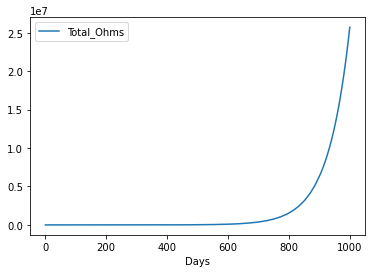

In [16]:
ohmGrowth_df.plot(x="Days", y="Total_Ohms") # Plot of the exponential curve. Compounded rewards!!

In [115]:
# Variable declarations
ohmStakedInit = 25.7 # Assume we are stating with 20 ohms
desiredUSDTarget = 100000
desiredOHMTarget = 1000
desiredDailyIncooom = 10000
desiredWeeklyIncooom = 2000
#================================================================================

rewardYield = round(1/100,5) # current staking reward yield. Curerntly the yield is 0.47% 
rebaseEpochs = 3 # Not really necessary to declare this here, but for reability it works for now
rebaseConst = 1 + rewardYield
currentAPY = 17407/100 # current staking %APY. Need to make this read from a source or user entry

It would take 92 days to reach your target of 100000 USD
It would take 131 days to reach your target of 1000 OHM
It would take 123 days from day 1 of staking to reach your desired weekly incooom
Alternatively, you need 329993 USD to start earning your weekly incooom of 10000
It would take 2 days from day 1 of staking to reach your desired weekly incooom
Alternatively, you need 8718 USD to start earning your weekly incooom of 2000


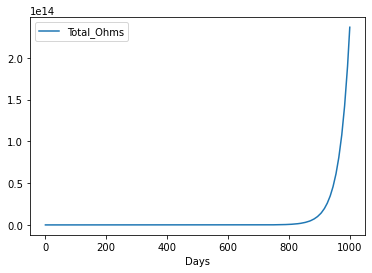

In [116]:
# Import all necessary libraries
import math # Needed for basic math operations\n",
import pandas as pd # Needed fpr dataframe creation and operations\n",
import numpy as np # Needed for array manipulations\n",
from itertools import islice # Needed for more complex row and coloumn slicing\n",
import matplotlib.pyplot as plt # Needed for quickly ploting results"
#================================================================================

# Pull most recent ohm price from coingecko
from pycoingecko import CoinGeckoAPI # Pulls live data from coingecko
cg = CoinGeckoAPI() # Pulls live price feed from coingecko
ohmPrice = cg.get_price(ids='olympus',vs_currencies='usd') # Get most recent price from coingecko via api
ohmPrice = ohmPrice['olympus']['usd']
#================================================================================

# Let's get some ROI Outputs starting with the daily
dailyROI = (1+rewardYield)**3-1 # Equation to calculate your daily ROI based on reward Yield
dailyROI_P = dailyROI*100 # daily ROI in Percentage
#================================================================================

# 5 day ROI
fivedayROI = (1+rewardYield)**(5*3)-1 # Equation to calculate your 5 day ROI based on reward Yield
fivedayROI_P = fivedayROI*100 # 5 day ROI in Percentage
#================================================================================

# 7 day ROI
sevendayROI = (1+rewardYield)**(7*3)-1 # Equation to calculate your 7 day ROI based on reward Yield
sevendayROI_P = sevendayROI*100 # 7 day ROI in Percentage
#================================================================================

# 30 day ROI
monthlyROI = (1+rewardYield)**(30*3)-1 # Equation to calculate your 30 day ROI based on reward Yield
monthlyROI_P = monthlyROI*100 # 30 day ROI in Percentage
#================================================================================

# Annual ROI
annualROI = (1+rewardYield)**(365*3)-1 # Equation to calculate your annual ROI based on reward Yield
annualROI_P = annualROI*100 # Equation to calculate your annual ROI based on reward Yield
#================================================================================

# Let's create a nice looking table to view the results of our calculations. The table will contain the ROIs and the percentages
roiData = [['Daily',dailyROI_P],['5 Day',fivedayROI_P],['7 Day',sevendayROI_P],['1 Month',monthlyROI_P],['1 Year',annualROI_P]]
roiTablulated_df = pd. DataFrame(roiData,columns = ['Cadence','Percentage'])
#================================================================================

# ohm growth over time
# STEP 1 : create a data frame to hold all required data point. Data required would be Epochs since rebase are distributed every Epoch
ohmGrowth_df = pd.DataFrame(np.arange(3001), columns = ['Epochs']) # In this case let's consider 3000 Epochs which is 1000 days
ohmGrowth_df['Days'] = ohmGrowth_df.Epochs/3 # There are 3 Epochs per day so divide by 3 to get Days
#================================================================================

# To Calculate the ohm growth over 3000 Epochs or 1000 days, we loop through the exponential ohm growth equation every epoch\n",
totalOhms = [] # create an empty array that will hold the componded rewards\n",
ohmStakedGrowth = ohmStakedInit
for elements in ohmGrowth_df.Epochs: # Initialize the for loop to have loops equal to number of rows or number of epochs\n",
    totalOhms.append(ohmStakedGrowth) # populate the empty array with calclated values each iteration\n",
    ohmStakedGrowth = ohmStakedGrowth*(1+rewardYield) # compound the total amount of ohms \n",
ohmGrowth_df['Total_Ohms'] = totalOhms # Clean up and add the new array to the main data frame\n",
# This can be done eaily with list comprhension, but for the sake of learning and detail, this approach is fine"
#================================================================================

ohmGrowth_df.Days = np.around(ohmGrowth_df.Days,decimals=1) # Python is funny so let's round up our numbers . 1 decimal place for days",
ohmGrowth_df.Total_Ohms = np.around(ohmGrowth_df.Total_Ohms,decimals=3)  # Python is funny so let's round up our numbers . 3 decimal place for ohms"
#================================================================================

# ohm growth projection at current APY and Reward Yield
ohmGrowth_df.plot(x="Days", y="Total_Ohms") # Plot of the exponential curve. Compounded rewards!!

#================================================================================

# Days until you reach target USD by staking only
forcastUSDTarget = round((math.log(desiredUSDTarget/(ohmStaked_Targetvar*ohmPrice),rebaseConst)/3))
print ("It would take %d days to reach your target of %d USD" %(forcastUSDTarget,desiredUSDTarget))
#================================================================================

# Days until you reach target OHM by staking only
forcastOHMTarget = round(math.log(desiredOHMTarget/(ohmStaked_Targetvar),rebaseConst)/3)
print ("It would take %d days to reach your target of %d OHM" %(forcastOHMTarget,desiredOHMTarget))
#================================================================================

# Daily Incooom calculations
# Required OHMs until you are earning your desired daily incooom
requiredOHMDailyIncooom = round((desiredDailyIncooom/dailyROI)/ohmPrice)
# Days until you are earning your desired daily incooom from your current initial staked OHM amount
forcastDailyIncooom = round(math.log((requiredOHMDailyIncooom/ohmStakedInit),rebaseConst)/3)
requiredUSDForDailyIncooom = requiredOHMDailyIncooom*ohmPrice
print ("It would take %d days from day 1 of staking to reach your desired weekly incooom" %(forcastDailyIncooom))
print ("Alternatively, you need %d USD to start earning your weekly incooom of %d" %(requiredUSDForDailyIncooom,desiredDailyIncooom))
#================================================================================

# Weekly Incooom calculations
# Required OHMs until you are earning your desired weekly incooom
requiredOHMWeeklyIncooom = round((desiredWeeklyIncooom/sevendayROI)/ohmPrice)
# Days until you are earning your desired weekly incooom from your current initial staked OHM amount
forcastWeeklyIncooom = round(math.log((requiredOHMWeeklyIncooom/ohmStakedInit),rebaseConst)/3)
requiredUSDForWeeklyIncooom = requiredOHMWeeklyIncooom*ohmPrice
print ("It would take %d days from day 1 of staking to reach your desired weekly incooom" %(forcastWeeklyIncooom))
print ("Alternatively, you need %d USD to start earning your weekly incooom of %d" %(requiredUSDForWeeklyIncooom,desiredWeeklyIncooom))

In [78]:
requiredOHMWeeklyIncooom = round((desiredWeeklyIncooom/sevendayROI)/ohmPrice)

In [80]:
print(requiredOHMWeeklyIncooom)

149


In [95]:
sevendayROI

0.2323919403474468

In [101]:
requiredOHMWeeklyIncooom

172